In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
pd.options.display.max_seq_items = 100
pd.options.display.max_rows = 100
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Plot disease frequencies

### Mild condition

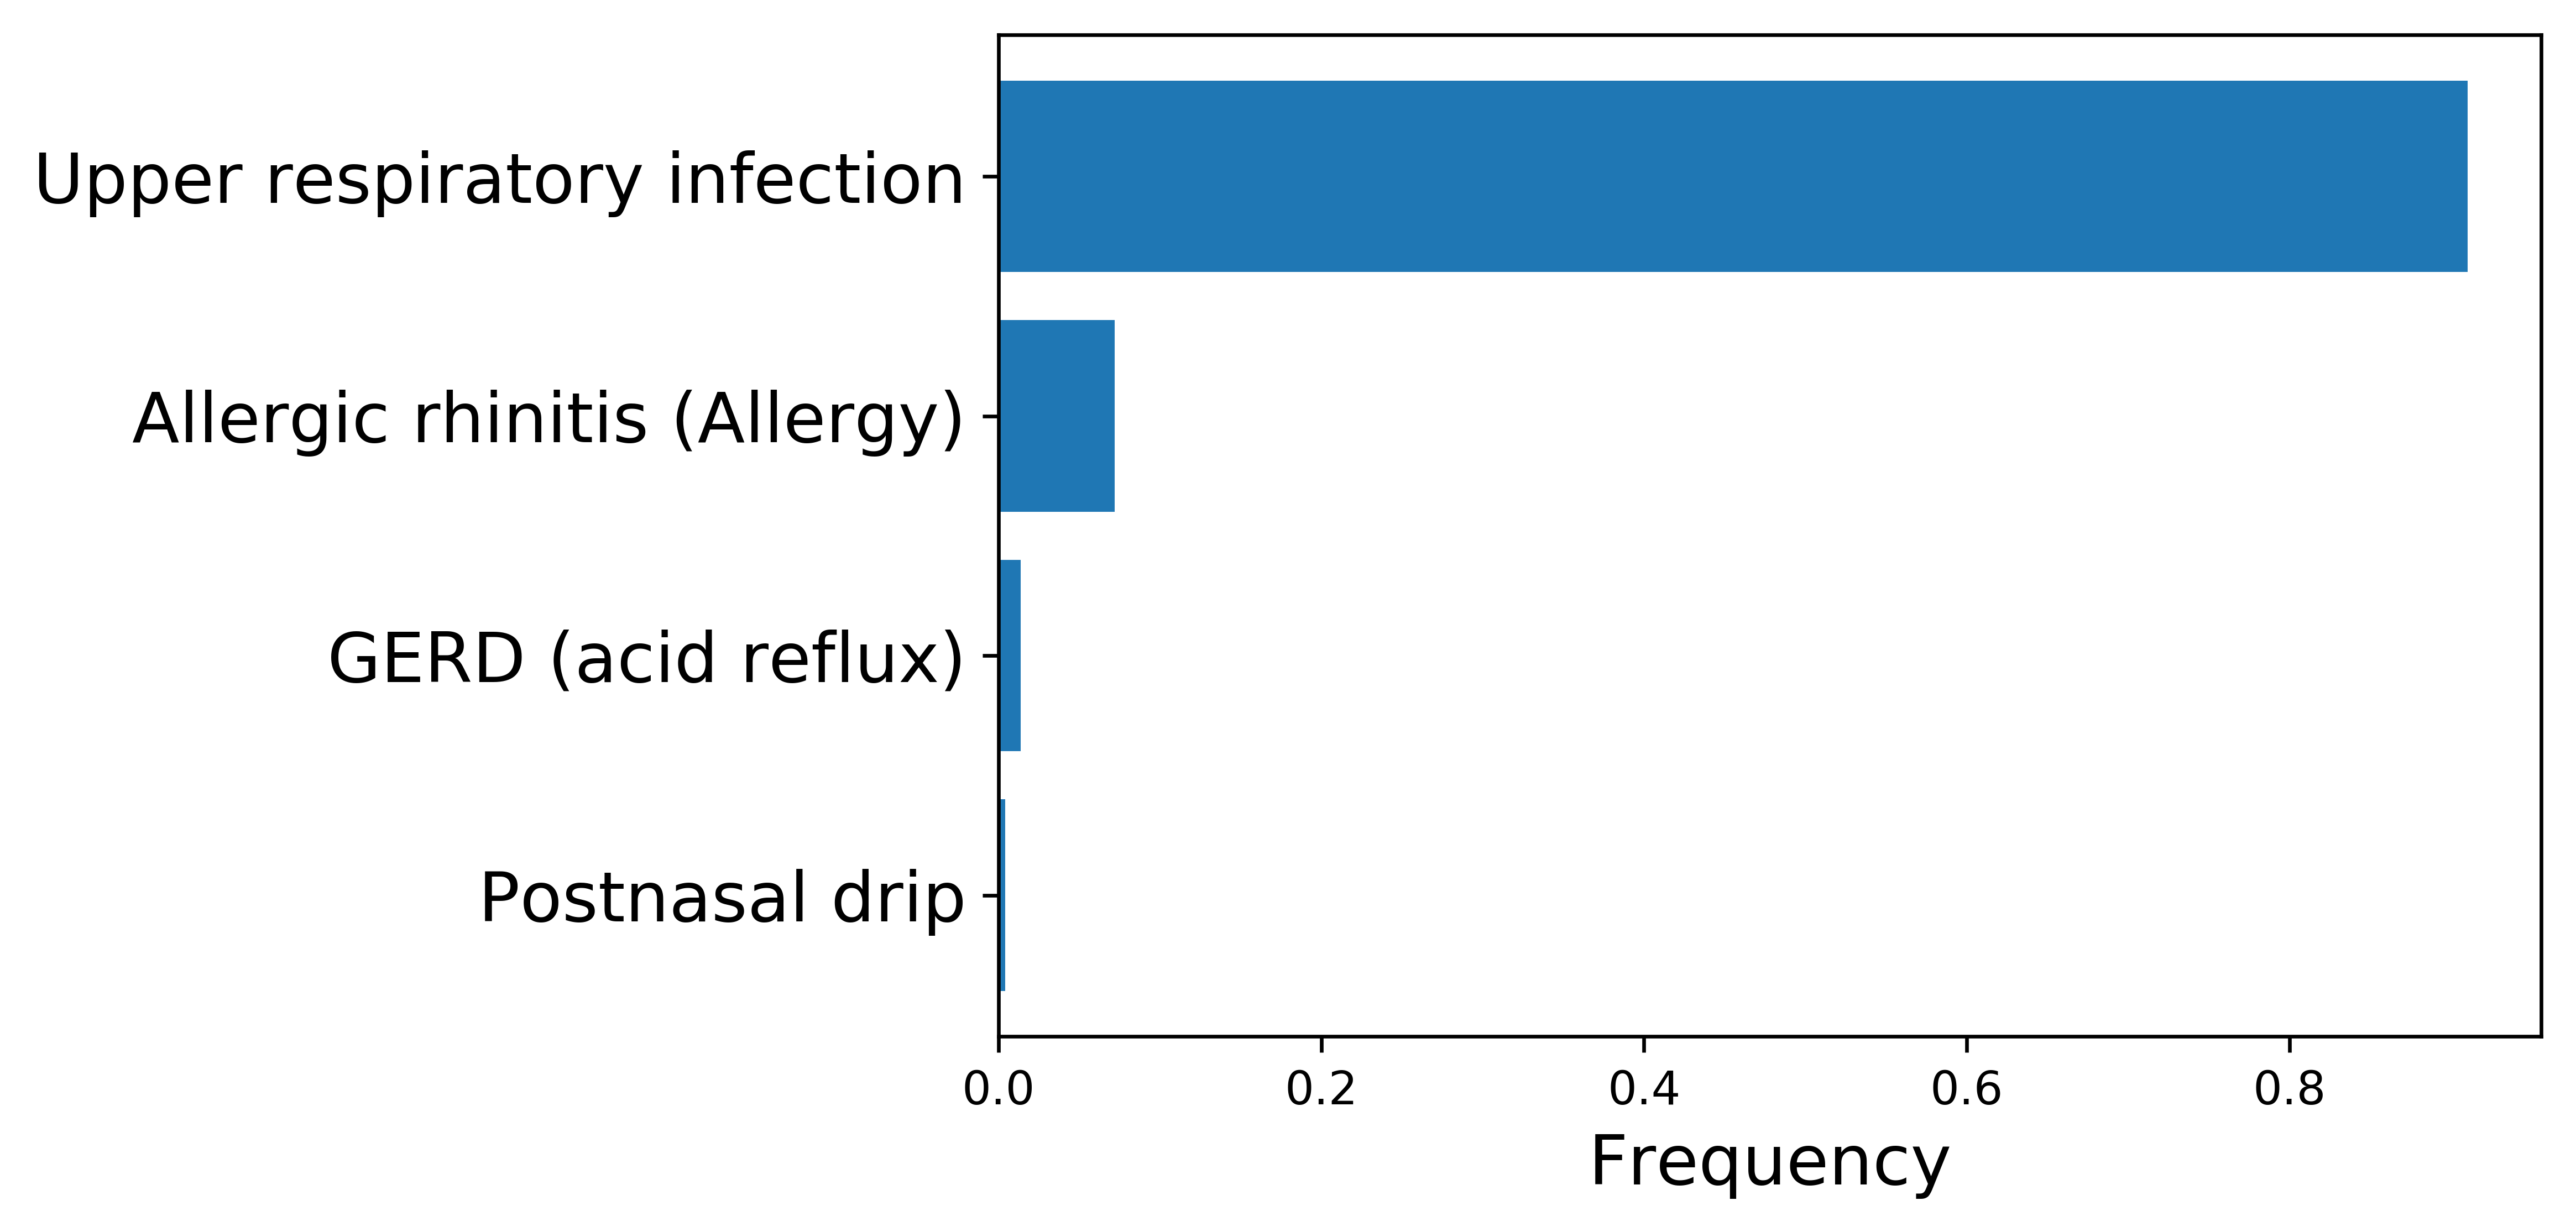

In [28]:
fig, ax = plt.subplots(dpi=600)
mild_objects = ('Upper respiratory infection', 'Allergic rhinitis (Allergy)', 'GERD (acid reflux)', 'Postnasal drip')
mild_y_pos = np.arange(len(mild_objects))
mild_frequency = [672/738,53/738,10/738,3/738]
ax.barh(mild_y_pos, mild_frequency, align='center')
ax.set_yticks(mild_y_pos)
ax.set_yticklabels(mild_objects, fontsize = 15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency', fontsize = 15)
#ax.set_title('Frequency of diseases in the mild category', fontsize = 20)
fig.savefig('mild_condition.png', bbox_inches='tight');

### Severe condition

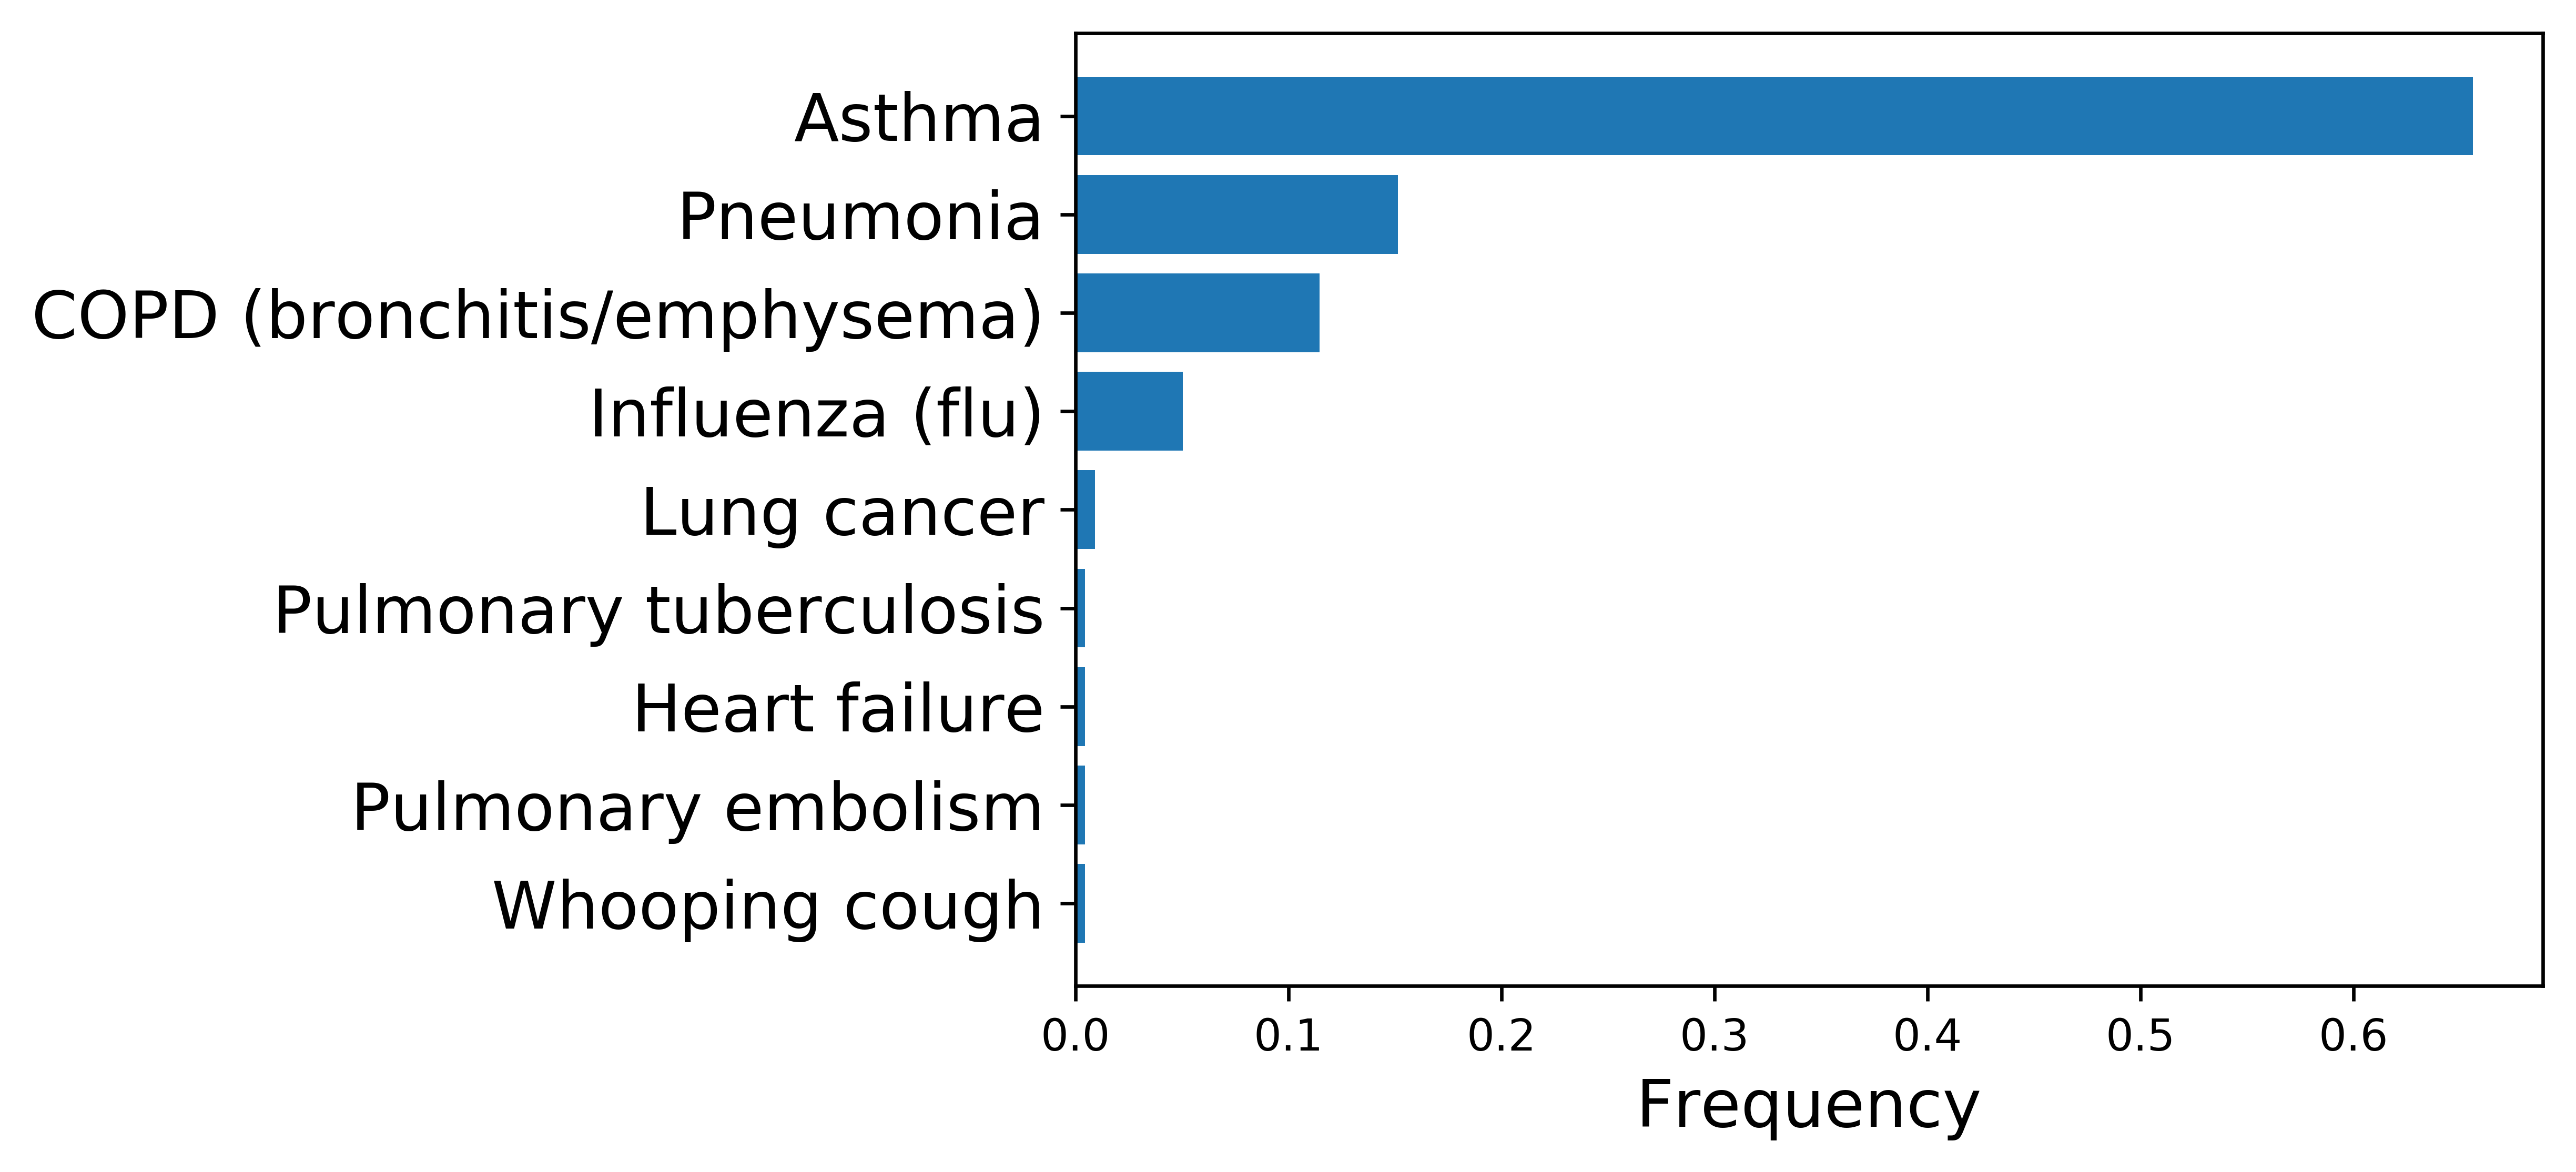

In [26]:
fig, ax = plt.subplots(dpi=600)
severe_objects = ('Asthma', 'Pneumonia', 'COPD (bronchitis/emphysema)', 'Influenza (flu)', 'Lung cancer', 'Pulmonary tuberculosis', 'Heart failure', 'Pulmonary embolism','Whooping cough')  
severe_y_pos = np.arange(len(severe_objects))
severe_frequency = [0.65596330275229353, 0.15137614678899083, 0.11467889908256881, 0.050458715596330278,
0.0091743119266055051, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525, 0.0045871559633027525]
ax.barh(severe_y_pos, severe_frequency, align='center')
ax.set_yticks(severe_y_pos)
ax.set_yticklabels(severe_objects, fontsize = 15)
ax.invert_yaxis();  # labels read top-to-bottom
ax.set_xlabel('Frequency', fontsize = 15)
#ax.set_title('Frequency of severe conditions', fontsize = 20)
fig.savefig('severe_condition2.png', bbox_inches='tight');

### All condition

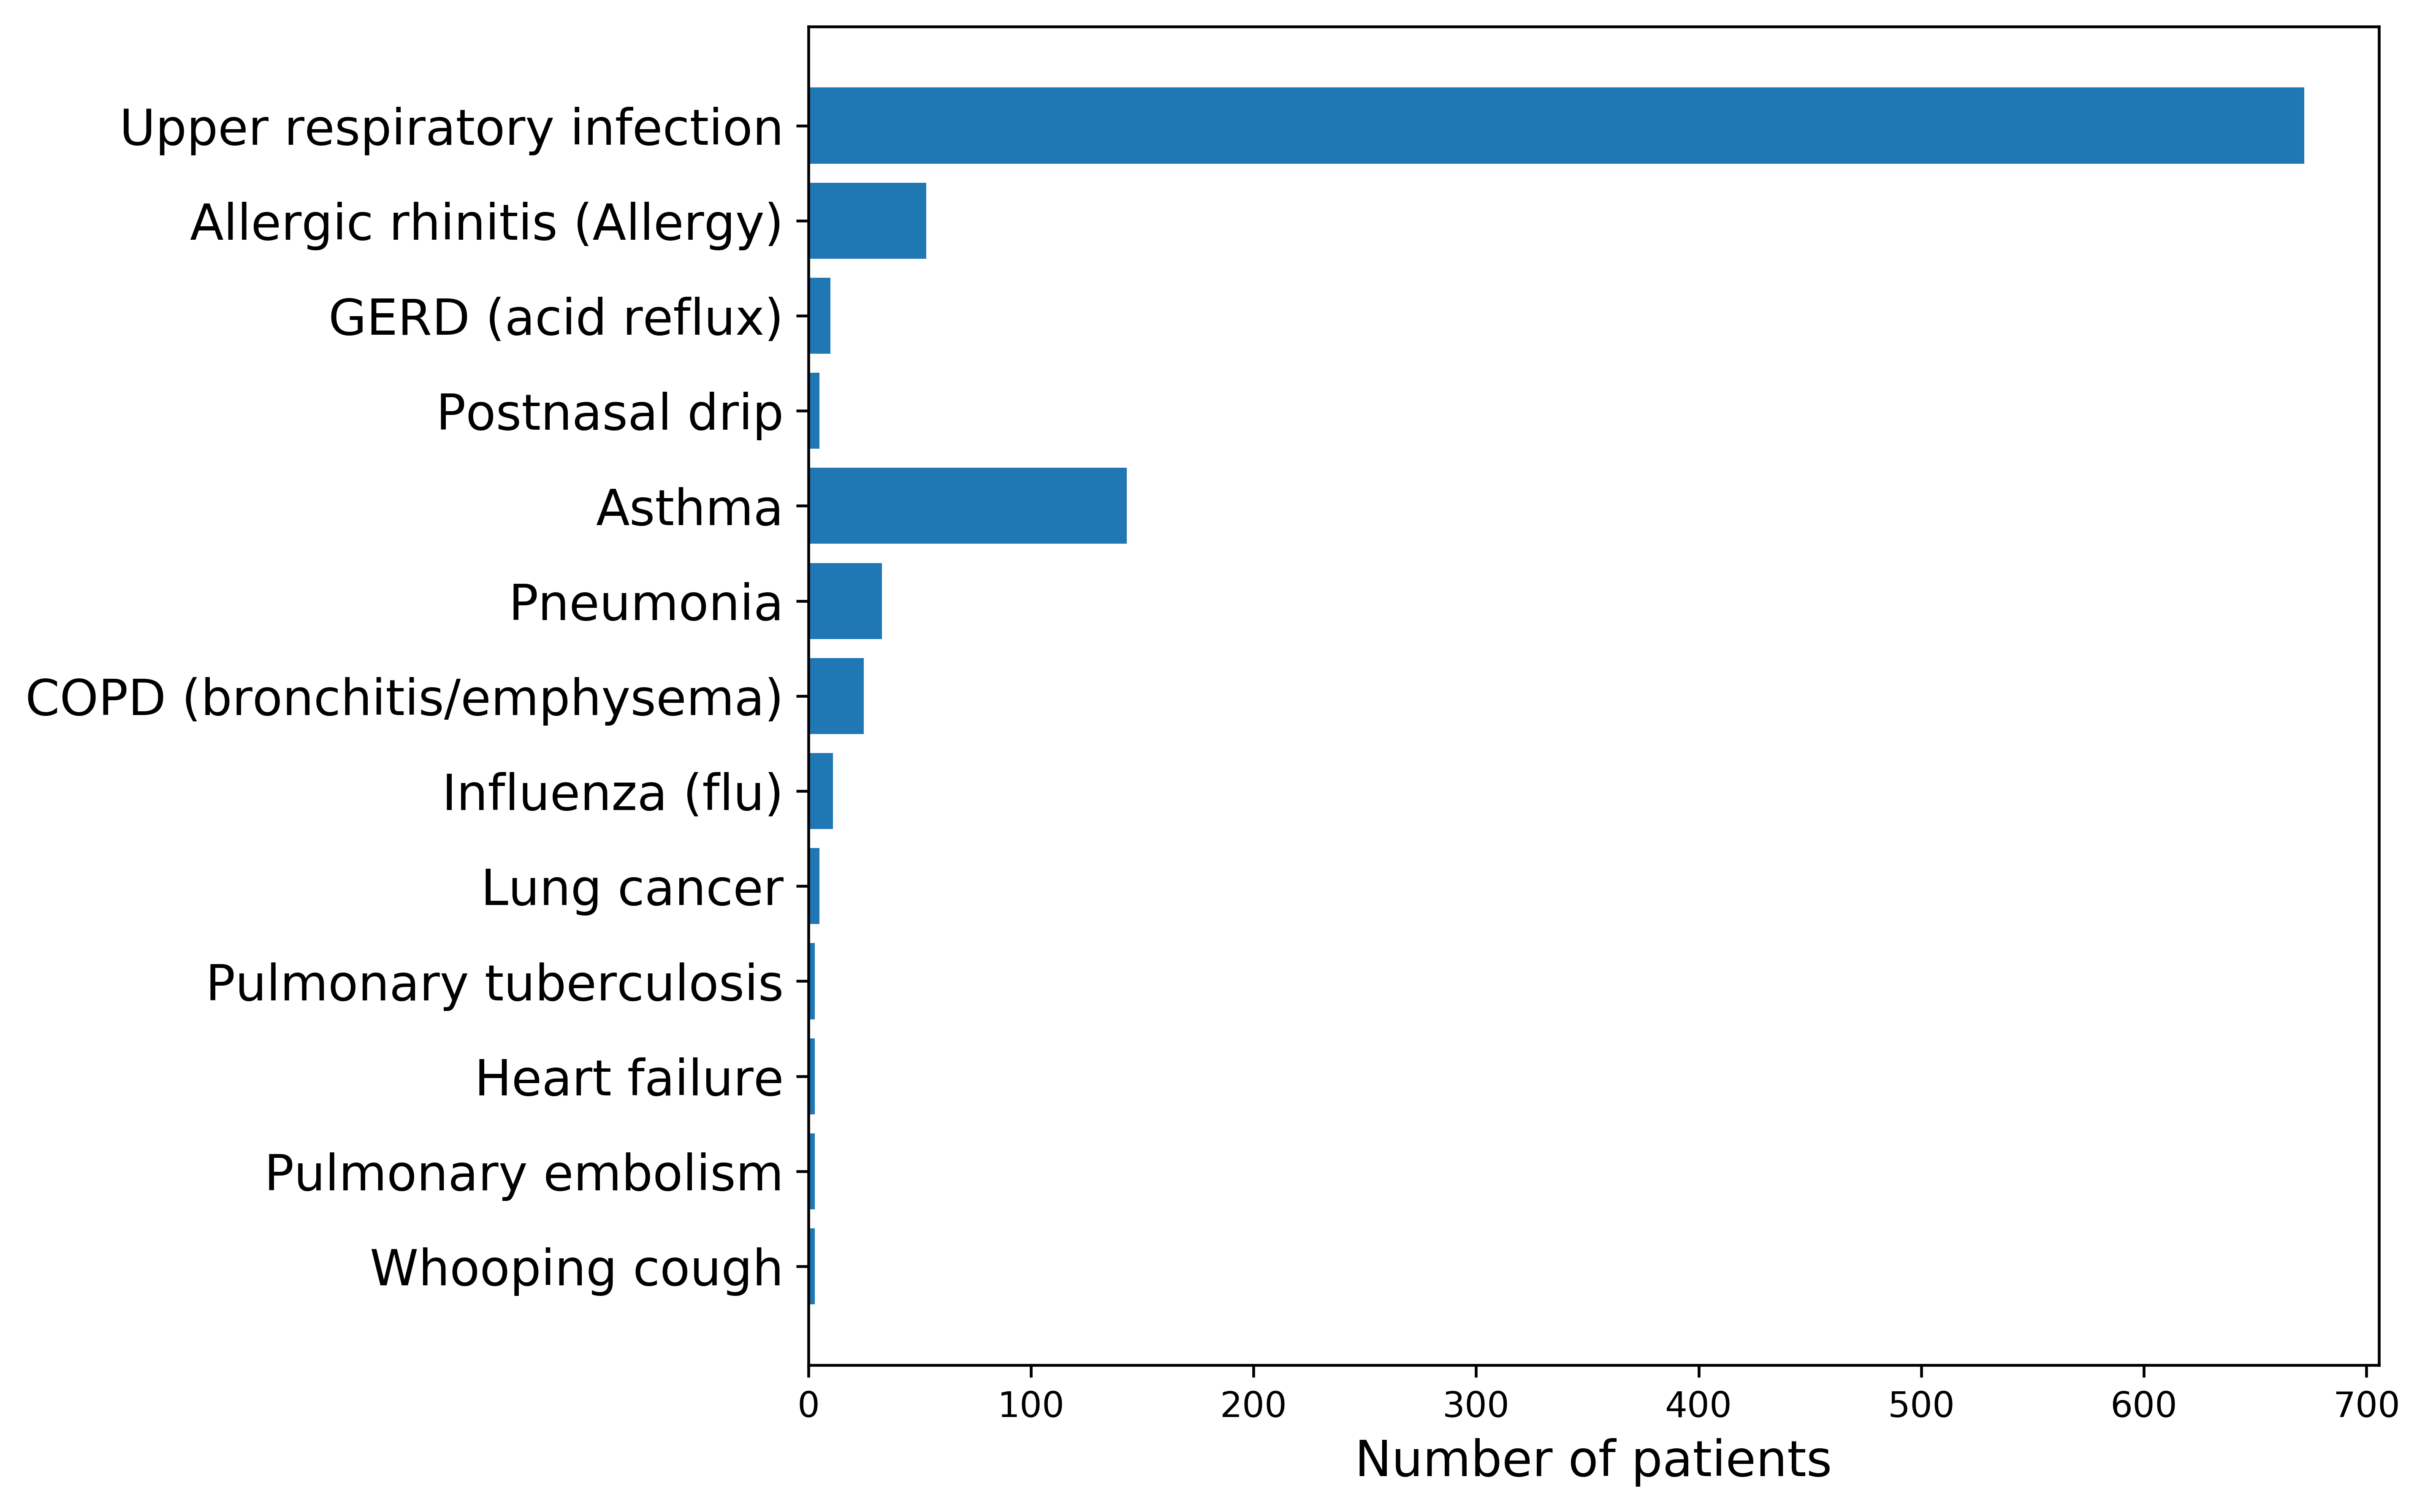

In [27]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=600)
objects = ('Upper respiratory infection', 'Allergic rhinitis (Allergy)', 'GERD (acid reflux)', 'Postnasal drip','Asthma', 'Pneumonia', 'COPD (bronchitis/emphysema)', 'Influenza (flu)', 'Lung cancer', 'Pulmonary tuberculosis', 'Heart failure', 'Pulmonary embolism','Whooping cough')  
y_pos = np.arange(len(objects))
frequency = [672,53,10,5,143, 33, 25, 11, 5, 3, 3, 3, 3]
ax.barh(y_pos, frequency, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(objects, fontsize = 14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of patients', fontsize = 14)
#ax.set_title('Number of diseases', fontsize = 20)
fig.savefig('number_of_diseases.png',bbox_inches='tight');

## Check variance of features

In [2]:
df = pd.read_csv('df_cough_2014.csv_convertNA.csv_convertRD_DIAG1R.csv_transformed.csv')

In [35]:
n_sample = df.shape[0]
print('Number of samples:', n_sample)
feature_occurence = df.sum(axis =0)
n = 20

print('Features with decent occurence:')
for index, value in feature_occurence.iteritems():
    if value >= n and value <= (n_sample - n): print(index, value)

#(df.sum(axis = 0) > 20).value_counts()[True]
#(df.sum(axis = 0) > 20).apply(lambda val: 1 if val else 0).sum()
# print(feature_occurence.sort_values(axis = 0))

print('Number of features with decent occurence:',feature_occurence.apply(lambda x: 1 if x >= n and x <= (n_sample - n) else 0).sum())
print('Number of features with occurence less than {}:'.format(n), (feature_occurence < n).sum())
print('Number of features with occurence more than {}:'.format(n_sample-n), (feature_occurence > (n_sample-n)).sum())

Number of samples: 956
Features with decent occurence:
DIAG1R 218.0
AGE 303.358695652
HTIN 674.827586207
WTLB 324.441520468
BMI 262.158725829
TEMPF 565.549180328
BPSYS 407.0
BPDIAS 380.846153846
SEX_2 458.0
RACERETH_2 76.0
RACERETH_3 128.0
RACERETH_4 76.0
USETOBAC_2.0 96.0
USETOBAC_3.0 59.0
MAJOR_2 62.0
MAJOR_3 68.0
MAJOR_9 26.0
HYPLIPID_1 114.0
OBESITY_1 43.0
DIABTYP 59.0
R_10050.0 24.0
R_10100.0 179.0
R_10150.0 35.0
R_10502.0 20.0
R_10900.0 20.0
R_12100.0 70.0
R_13551.0 40.0
R_14100.0 26.0
R_14101.0 44.0
R_14150.0 54.0
R_14250.0 82.0
R_14350.0 20.0
R_14551.0 173.0
R_14750.0 40.0
R_15300.0 34.0
DEPR 71.0
R_nasal_congestion 399.0
Number of features with decent occurence: 37
Number of features with occurence less than 20: 172
Number of features with occurence more than 936: 1


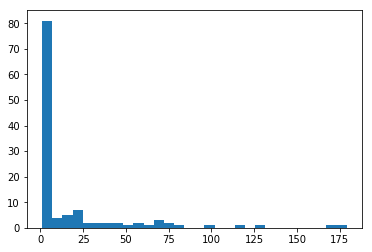

In [36]:
n = 10
feature_occurence.shape
feature_occurence[(feature_occurence > n) & (feature_occurence < 100)].shape
plt.hist(feature_occurence[(feature_occurence > 0) & (feature_occurence < 200)], bins = 30)
plt.savefig('hist_feature_occurence.png');

## Check categories of features

In [73]:
symptom_number = {'general':0,'mental':0,'nervous':0, 'cardio/lymph':0,'eye/ear':0,'respiratory':0,'digestive':0, 'genitourinary':0,'skin':0,'musculoskeletal':0}
for column in df.columns:
    if column.startswith('R_10'): symptom_number['general']+=1
    elif column.startswith('R_11'): symptom_number['mental']+=1
    elif column.startswith('R_120'): symptom_number['nervous']+=1
    elif column.startswith('R_121'): symptom_number['nervous']+=1
    elif column.startswith('R_122'): symptom_number['nervous']+=1
    elif column.startswith('R_123'): symptom_number['nervous']+=1
    elif column.startswith('R_124'): symptom_number['nervous']+=1
    elif column.startswith('R_125'): symptom_number['nervous']+=1
    elif column.startswith('R_12'): symptom_number['cardio/lymph']+=1
    elif column.startswith('R_13'): symptom_number['eye/ear']+=1
    elif column.startswith('R_14'): symptom_number['respiratory']+=1
    elif column.startswith('R_15'): symptom_number['digestive']+=1
    elif column.startswith('R_160'): symptom_number['digestive']+=1
    elif column.startswith('R_161'): symptom_number['digestive']+=1
    elif column.startswith('R_162'): symptom_number['digestive']+=1
    elif column.startswith('R_163'): symptom_number['digestive']+=1
    elif column.startswith('R_16'): symptom_number['genitourinary']+=1
    elif column.startswith('R_17'): symptom_number['genitourinary']+=1
    elif column.startswith('R_180'): symptom_number['genitourinary']+=1
    elif column.startswith('R_181'): symptom_number['genitourinary']+=1
    elif column.startswith('R_182'): symptom_number['genitourinary']+=1
    elif column.startswith('R_18'): symptom_number['skin']+=1
    elif column.startswith('R_19'): symptom_number['musculoskeletal']+=1
print(symptom_number)        

{'general': 31, 'mental': 14, 'nervous': 10, 'cardio/lymph': 5, 'eye/ear': 19, 'respiratory': 28, 'digestive': 27, 'genitourinary': 20, 'skin': 11, 'musculoskeletal': 29}


In [79]:
# Convert dictionary to list
feature_type = ['basic_info','preexisting']
feature_number = [13, 17]
for key, value in symptom_number.items():
    feature_type.append(key)
    feature_number.append(value)
print(feature_type, feature_number)

['basic_info', 'preexisting', 'general', 'mental', 'nervous', 'cardio/lymph', 'eye/ear', 'respiratory', 'digestive', 'genitourinary', 'skin', 'musculoskeletal'] [13, 17, 31, 14, 10, 5, 19, 28, 27, 20, 11, 29]


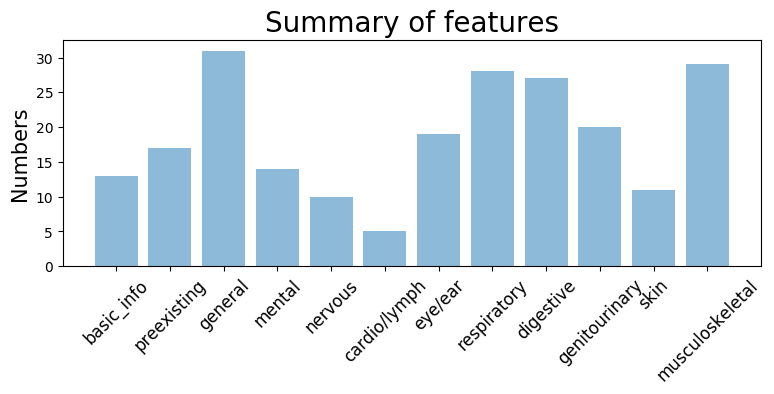

In [94]:
# Plot numbers of features in each category
plt.gcf().subplots_adjust(bottom=0.7)
y_pos = np.arange(len(feature_type))
fig = plt.figure(figsize=(9, 3), dpi=100)
plt.bar(y_pos, feature_number, alpha=0.5) # alpha: 0.0 transparent through 1.0 opaque
plt.xticks(y_pos, feature_type, rotation = 45, fontsize = 12)
plt.ylabel('Numbers', fontsize = 15)
plt.title('Summary of features', fontsize = 20)
plt.savefig('summary_of_features.png');

## Check correlation between a feature and outcomes

In [57]:
def cor_feature_outcome (feature_col_name, feature_name):
    plt.hist(df.loc[df.DIAG1R == 0, feature_col_name], normed=1, alpha = 0.5, bins = 25, label = 'Mild')
    plt.hist(df.loc[df.DIAG1R == 1, feature_col_name], normed=1, alpha = 0.5, bins = 25, label = 'Severe')
    plt.title(feature_name + ' vs health condition')
    plt.xlabel(feature_name + ' no or yes')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show();

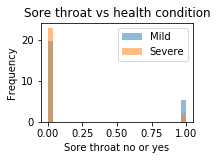

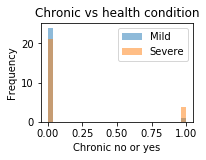

In [58]:
plt.subplot(221);
cor_feature_outcome('R_14551.0', 'Sore throat');
plt.subplot(222);
cor_feature_outcome('MAJOR_2', 'Chronic');

In [36]:
# Wheezing
df.loc[df.DIAG1R == 0, 'R_14250.0'].value_counts()
df.loc[df.DIAG1R == 1, 'R_14250.0'].value_counts()

0    702
1     36
Name: R_14250.0, dtype: int64

0    172
1     46
Name: R_14250.0, dtype: int64

In [8]:
# Sore throat
df.loc[df.DIAG1R == 0, 'R_14551.0'].value_counts()
df.loc[df.DIAG1R == 1, 'R_14551.0'].value_counts()

0    583
1    155
Name: R_14551.0, dtype: int64

0    200
1     18
Name: R_14551.0, dtype: int64

In [3]:
# Smoking
df.loc[df.DIAG1R == 0, 'USETOBAC_3.0'].value_counts()
df.loc[df.DIAG1R == 1, 'USETOBAC_3.0'].value_counts()

0    702
1     36
Name: USETOBAC_3.0, dtype: int64

0    195
1     23
Name: USETOBAC_3.0, dtype: int64

In [9]:
# Vomiting
df.loc[df.DIAG1R == 0, 'R_15300.0'].value_counts()
df.loc[df.DIAG1R == 1, 'R_15300.0'].value_counts()

0    722
1     16
Name: R_15300.0, dtype: int64

0    200
1     18
Name: R_15300.0, dtype: int64

In [12]:
# Nasal congestion
df.loc[df.DIAG1R == 0, 'R_nasal_congestion'].value_counts()
df.loc[df.DIAG1R == 1, 'R_nasal_congestion'].value_counts()

0    397
1    341
Name: R_nasal_congestion, dtype: int64

0    160
1     58
Name: R_nasal_congestion, dtype: int64

## Check the distribution and range of age

In [59]:
df2 = pd.read_csv('df_cough_2014.csv_convertNA.csv_convertRD_DIAG1R.csv')

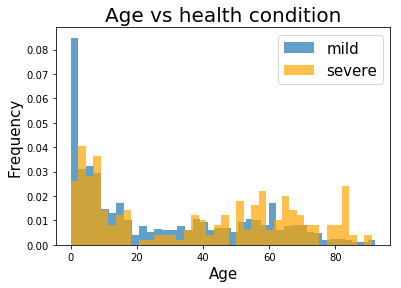

In [60]:
plt.hist(df2.loc[df2.DIAG1R == 0, 'AGE'], normed=1, alpha = 0.7, bins = 40, label = 'mild')
plt.hist(df2.loc[df2.DIAG1R == 1, 'AGE'], normed=1, alpha = 0.7, bins = 40, label = 'severe',color = 'orange')
plt.title('Age vs health condition', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('condition_vs_age.png', dpi=600, bbox_inches='tight');

### Calculate the range of age for web app model

In [57]:
def calculate_min_max (df, col):
    min = df[col].min()
    max = df[col].max()
    return min, max

In [58]:
calculate_min_max (df2, 'AGE')

(0, 92)